月平均气温数据: DATE
1998-01-31    15.243447
1998-02-28    16.897273
1998-03-31    19.981246
1998-04-30    25.231383
1998-05-31    27.108454
Freq: ME, Name: TMP, dtype: float64


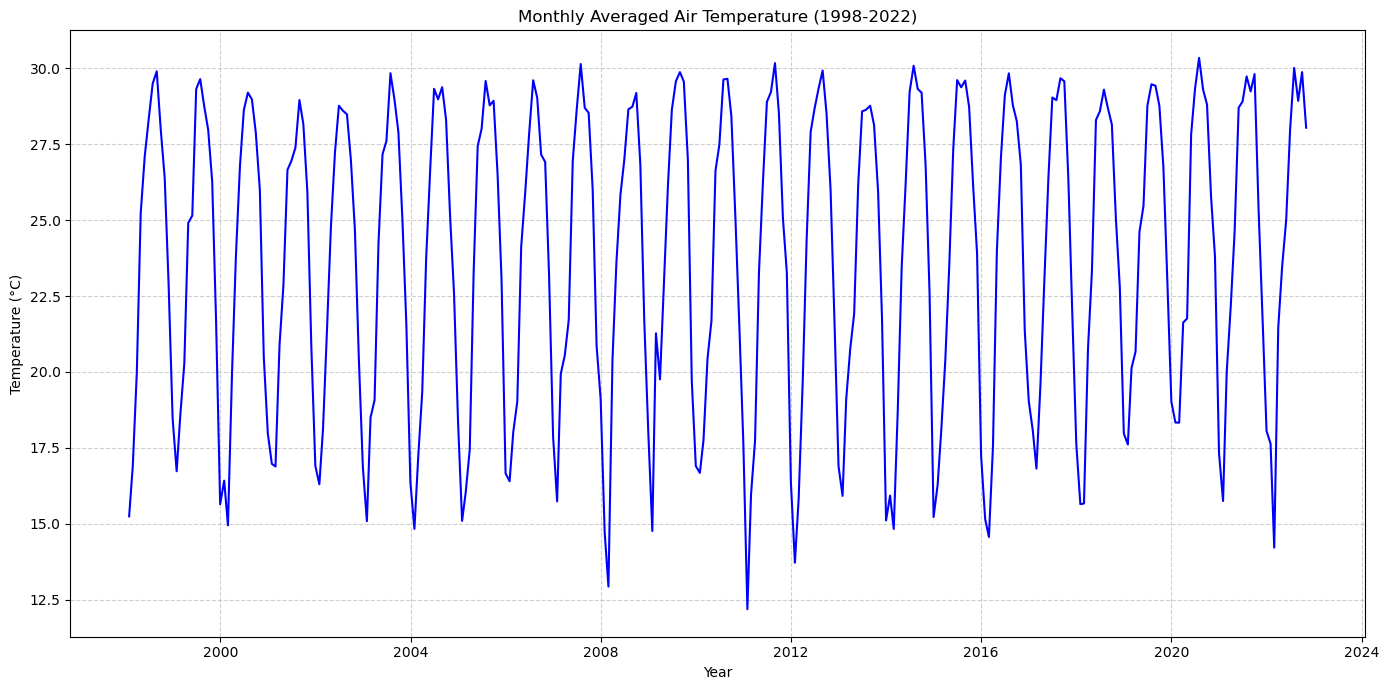

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 读取CSV文件
data = pd.read_csv('Baoan_Weather_1998_2022.csv', low_memory=False)
# 去除 TMP 列的 `+` 符号，并将逗号替换为小数点
data['TMP'] = data['TMP'].astype(str).str.replace('+', '').str.replace(',', '.').astype(float)

# 将值为 9999.9 的数据标记为缺失值（NaN）
data['TMP'] = data['TMP'].replace(9999.9, np.nan)
# 选择填充 NaN 值，例如用列的均值
data.fillna({'TMP': data['TMP'].mean()}, inplace=True)

# 将温度值除以10，获得实际温度
data['TMP'] = data['TMP'] / 10

# 设置 'DATE' 列为 datetime 格式
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# 设置日期为索引并生成每月的平均气温
data.set_index('DATE', inplace=True)
monthly_avg_temp = data['TMP'].resample('ME').mean()

# 输出月平均气温的前几行数据
print("月平均气温数据:", monthly_avg_temp.head())

# 绘制月平均气温的时间序列图
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, color='b', linewidth=1.5)
plt.title("Monthly Averaged Air Temperature (1998-2022)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()